In [1]:
# importing the general libraries 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline 

# Problem Statement 1 
Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.

Data Dictionary for Market Segmentation:

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s)

1. Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2. Do you think scaling is necessary for clustering in this case? Justify

3. Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

4. Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

5. Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

1.1 Read the data and do exploratory data analysis (3 pts). Describe the data briefly. Interpret the inferences for each (3 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [2]:
# Read the dataset
bank = pd.read_csv('bank_marketing_part1_Data.csv')
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


## Exploratory Data Analysis 

In [3]:
# Lets us check the numbers of row and column in the dataset.
bank.shape

(210, 7)

There are total 210 rows and 7 columns(features)

In [4]:
# Lets us check the info of the dataset 
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
spending                        210 non-null float64
advance_payments                210 non-null float64
probability_of_full_payment     210 non-null float64
current_balance                 210 non-null float64
credit_limit                    210 non-null float64
min_payment_amt                 210 non-null float64
max_spent_in_single_shopping    210 non-null float64
dtypes: float64(7)
memory usage: 11.6 KB


1. There are in total 210 entries and 7 columns in the dataset
2. All the features has total 210 recored that means there are no missing values in the dataset.
3. All the features(7) are of float data type.

In [5]:
# Lets check for duplicates in the dataset 
print("Number of duplicated data:",format(bank.duplicated().sum()))

Number of duplicated data: 0


There are no duplicate entries in the dataset.

In [6]:
# Lets us check the stats of the data
bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


##### Insights
1. Spending: Mean value is 14.84 and the standard deviation is 2.909. 
.The minimun amount spent by the customer per month is 10.59, whereas 25% of customer has spend 12.27, 50% customer has spend 14.35, 75 % of customer have spend 17.30 and the maximum spending of the customer is 21.18.

2. Advance_Payments: Mean value is 14.55 and standard deviation is 1.30.
. The minimum amount paid by the customer in advance by cash is 12.41, whereas 25% of customer has paid 13.45, 50% customer has paid 14.32, 75% of customer hace paid 15.71 and the maximum paid amount by the customer is 17.25. 

3. Probability_of_full_payment: Mean value is 0.870 and the standard deviation is 0.02. 
. The minimum probability of payment done in full by the customer to the bank is 0.808(80%), Whereas 25% of customer will pay full payment is 0.85(85%), 50% of customer will pay full is 0.87(87%), 75% of customer will pay full is 0.88(88%) and the maximum number of customer will do the full payment is 0.91(91%). It tell us that 91% of customer will pay the full amount to the bank. 

4. Current_balance: Mean value is 5.62 and the standard deviation is 0.44. 
. The minimum balance amount left in the account of customers, to make purchases is 4.89, whereas the 25% of customer balance amount is 5.26, 50% of customer have balance amount of 5.52, 75% of customer have balance amount of 5.97 and the maximun balance amount left in the account of the customer to make purchases is 6.67. 

5. Credit_limit: Mean value is 3.25 and the standard deviation is 0.377. 
. The minimum limit of the amount in credit card is 2.63, whereas for 25% the limit of the amount in the credit card is 2.94, for 50% the limit of the amount in the credit card is 3.23, for 75% the limit of the amount in the credit card is 3.56 and the maximum limit of the amount in credit card is 4.03. 

6. min_payment_amt: Mean value is 3.70 and the standard deviation is 1.50. 
. The minimum paid by the customer while making payments for purchases made monthly is 0.76, whereas 25% it is 2.56, 50% it is 3.59, 75% it is 4.76 and the maximum it is 8.45

7. max_spent_in_single_shopping: Mean value is 5.40 and the standard deviation is 0.49
. The minimum maximum amount spent in one purchase is 4.51, whereas 25% it is 5.04, 50% it is 5.22, 75% it is 5.87 and the maximum it is 6.55. 

## Data Visualization 

### Univarient Analysis

spending
Skew : 0.4


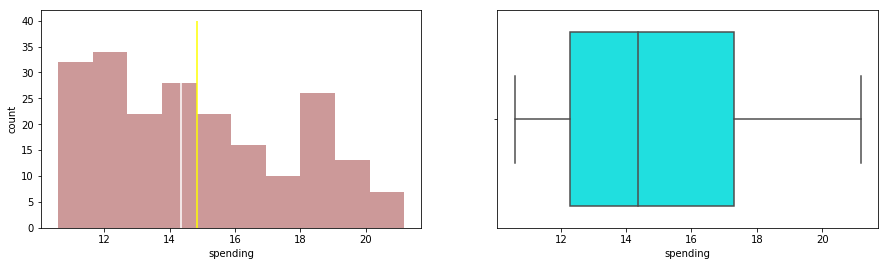

advance_payments
Skew : 0.39


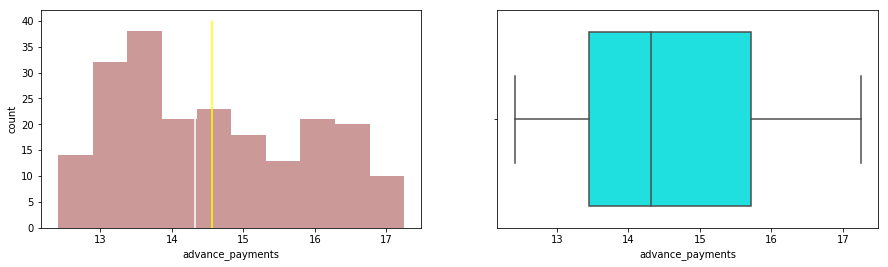

probability_of_full_payment
Skew : -0.54


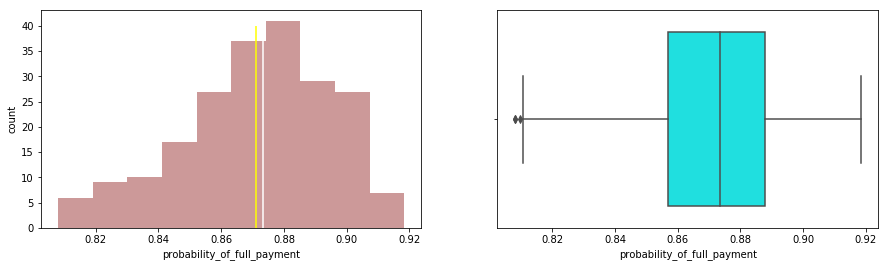

current_balance
Skew : 0.53


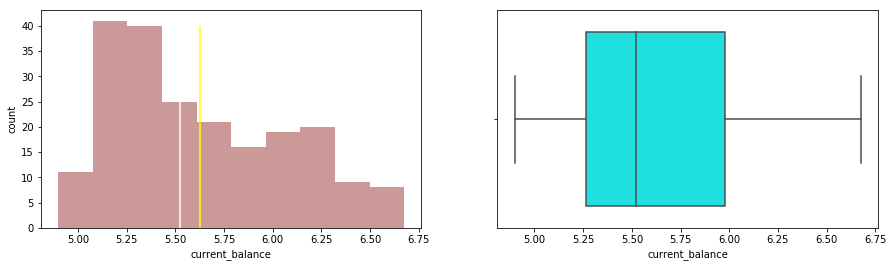

credit_limit
Skew : 0.13


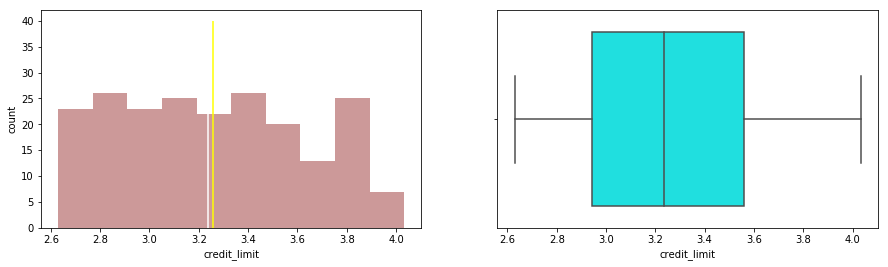

min_payment_amt
Skew : 0.4


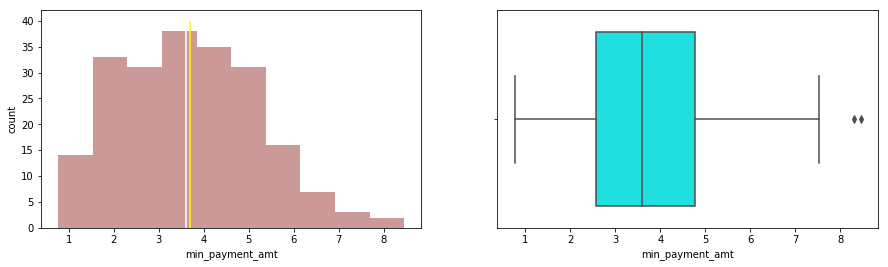

max_spent_in_single_shopping
Skew : 0.56


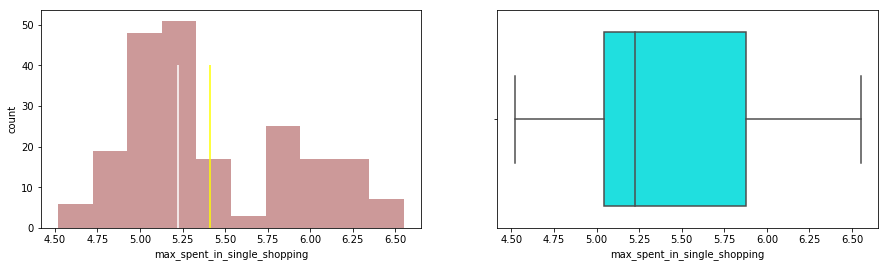

In [7]:
cont_cols = list(bank.columns)
for col in cont_cols:
    print(col)
    print('Skew :',round(bank[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    # bank[col].hist(bins=10,edgecolor='#E6E6E6', color='Maroon')
    sns.distplot(bank[col],norm_hist=False,kde = False,bins = 10, color='Maroon')
    plt.vlines(bank[col].mean(),ymin = 0, ymax = 40,color = 'Yellow')
    plt.vlines(bank[col].median(),ymin = 0, ymax = 40,color = 'White')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(bank[col],color='Cyan')
    plt.show()

#### Insights
- From the above visualization we can say that variables credit_limit and min_paymnet_amt are almost normalize there is very small amount of skewness present. 

- max_spending_in_single_shopping is highly right skewed. 

- The variables spending, advance_payment and current_balance seems to have moderate right skew.

- Probability_of_full_payment seems to have a moderate left skew.

- From the boxplot it is clear that variable probability_of_full_payment and min_payment_amt have a smaller numbers of outliers

In [8]:
# Another method to plot the above graph.

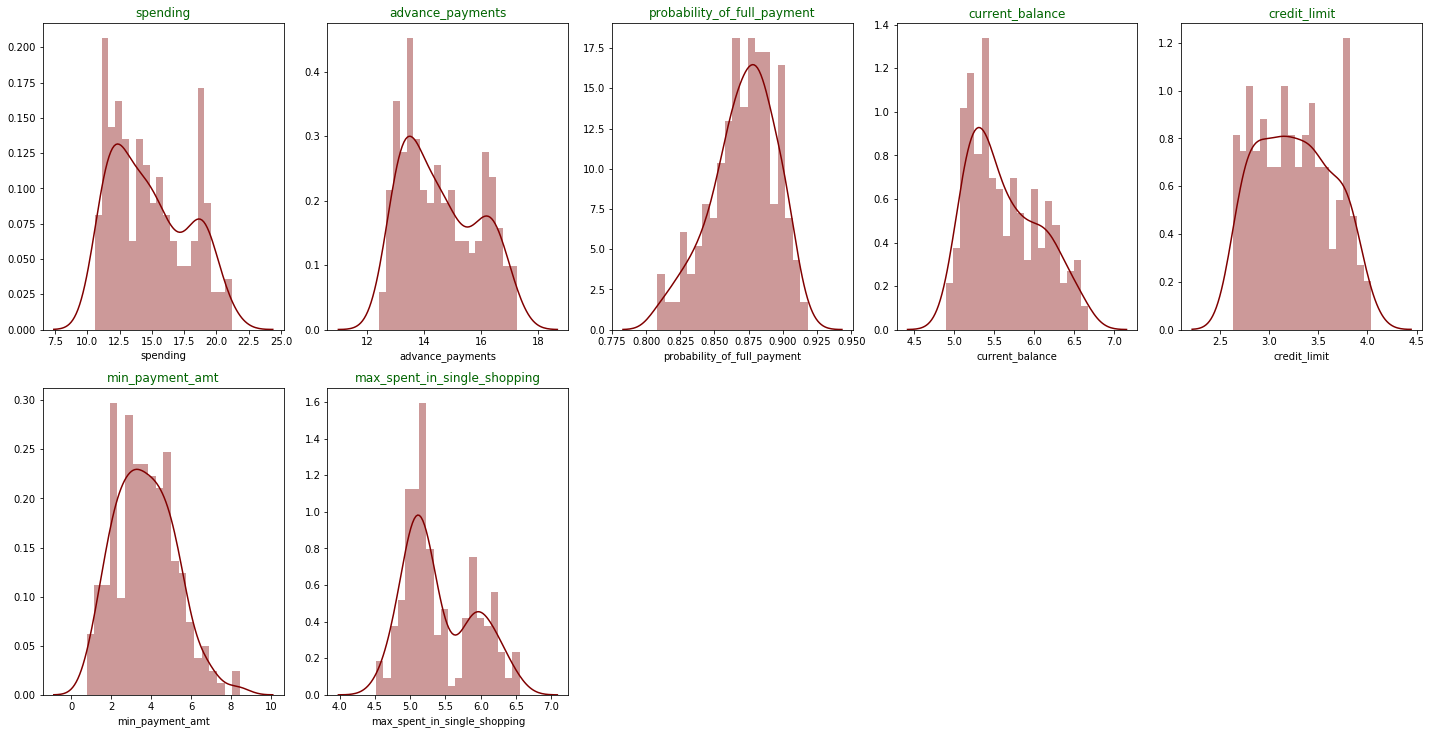

In [9]:
data_scatter=bank.copy(deep=True)
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,5,i+1)
    sns.distplot(data_scatter[data_scatter.columns[i]], bins=20, color= 'Maroon')
    ax.set_title(data_scatter.columns[i],color='DarkGreen')
plt.tight_layout()

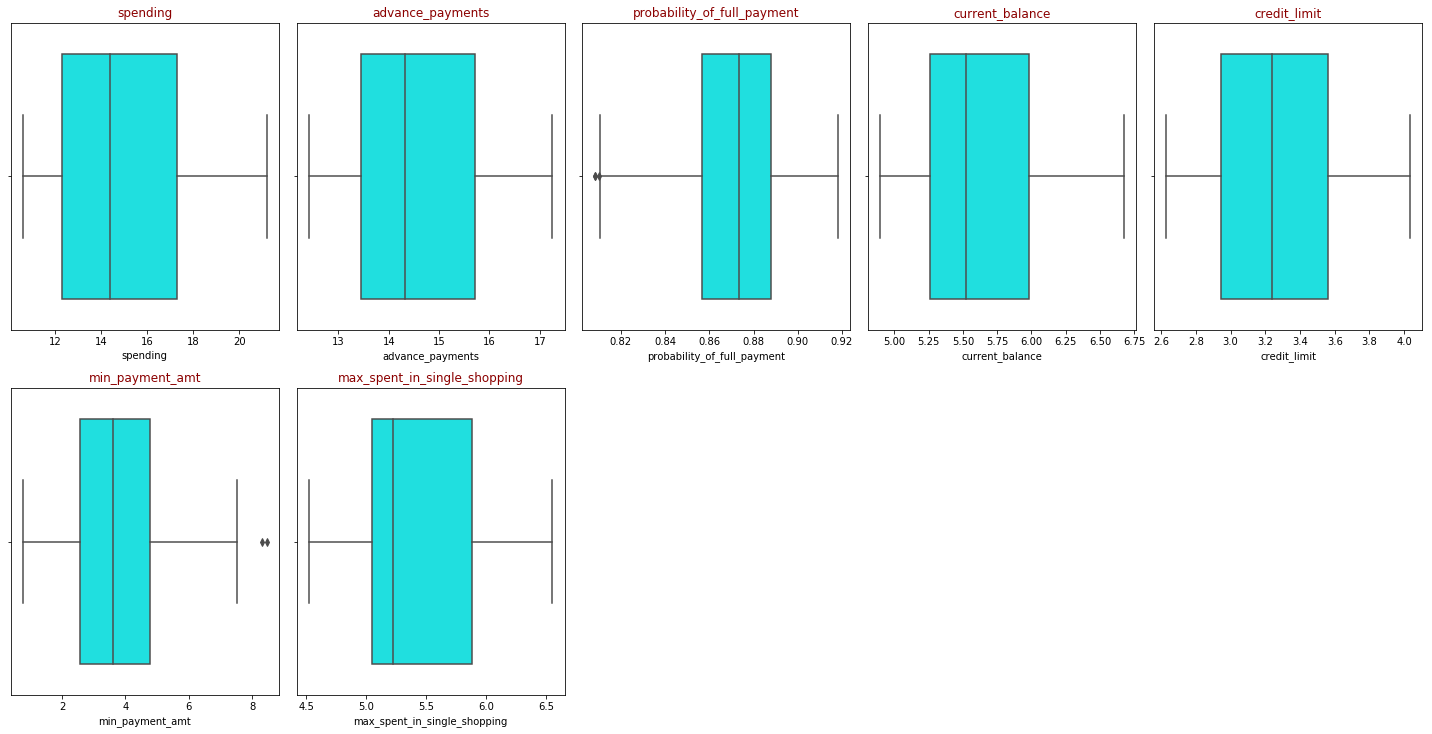

In [10]:
data_scatter=bank.copy(deep=True)
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_scatter.columns)):
    ax=fig.add_subplot(4,5,i+1)
    sns.boxplot(data_scatter[data_scatter.columns[i]],color= 'Cyan')
    ax.set_title(data_scatter.columns[i],color='DarkRed')
plt.tight_layout()

### Bivarient Analysis

spending vs max_spent_in_single_shopping


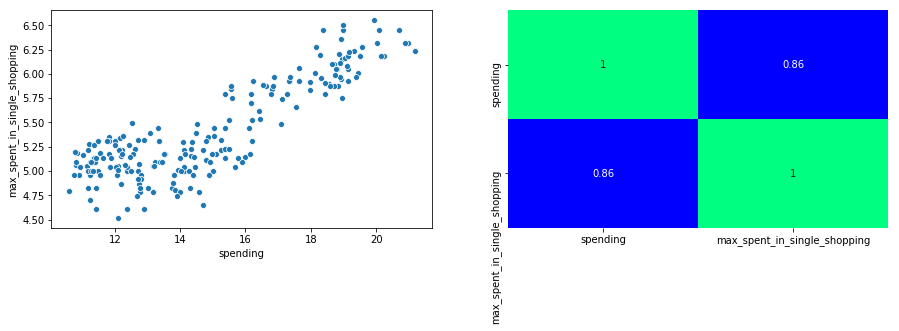

advance_payments vs spending


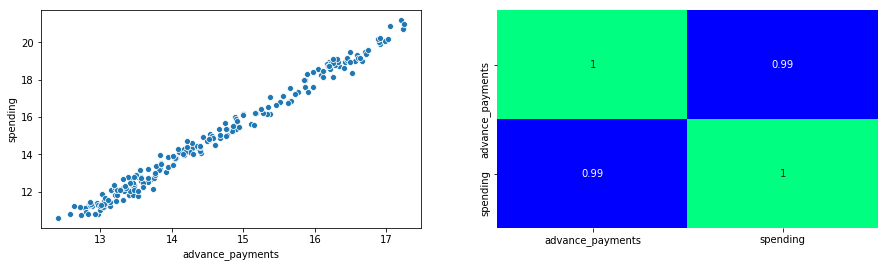

probability_of_full_payment vs advance_payments


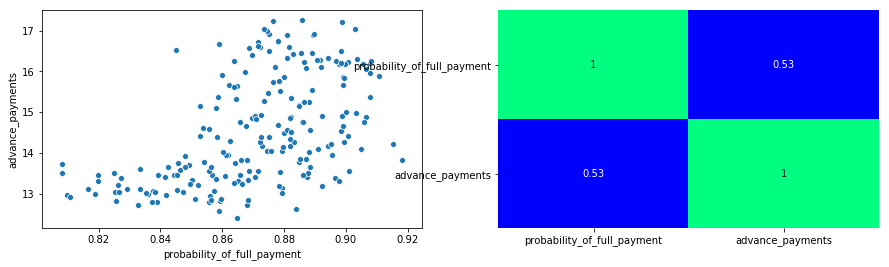

current_balance vs probability_of_full_payment


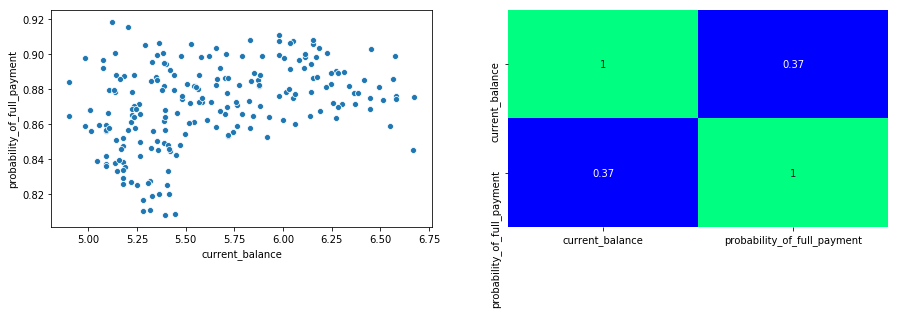

credit_limit vs current_balance


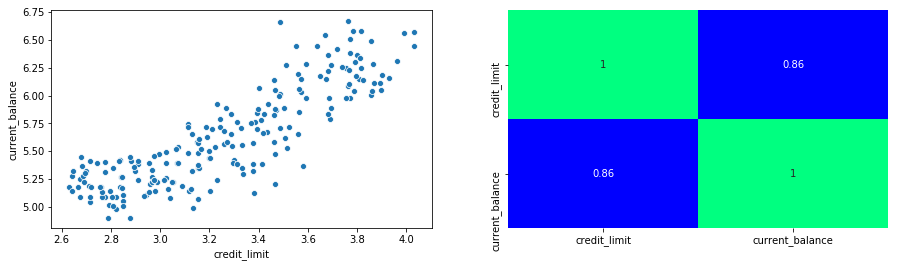

min_payment_amt vs credit_limit


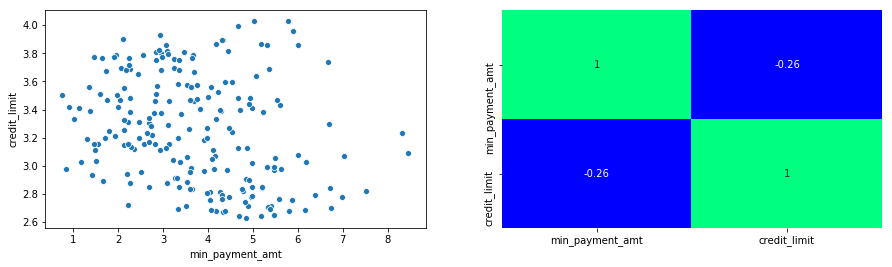

max_spent_in_single_shopping vs min_payment_amt


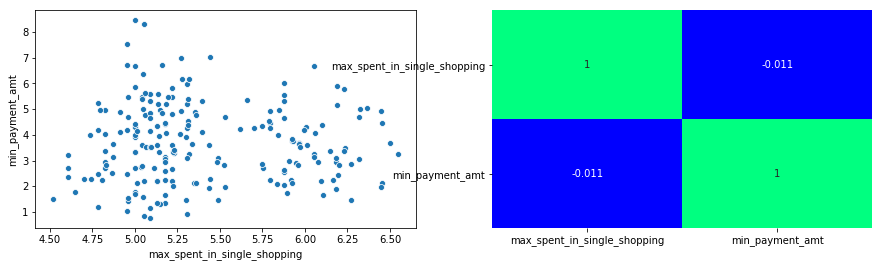

In [11]:
sns.color_palette("tab10")

cont_cols = list(bank.columns)
for col in range(0,len(cont_cols)):
    print(cont_cols[col],'vs',cont_cols[col-1])
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    sns.scatterplot(bank[cont_cols[col]],bank[cont_cols[col-1]])
    plt.subplot(1,2,2)
    sns.heatmap(np.corrcoef(bank[cont_cols[col]],bank[cont_cols[col-1]]),annot=True, 
                yticklabels=[cont_cols[col],cont_cols[col-1]],xticklabels=[cont_cols[col],cont_cols[col-1]]
               ,cmap='winter',cbar=False)
    plt.show()

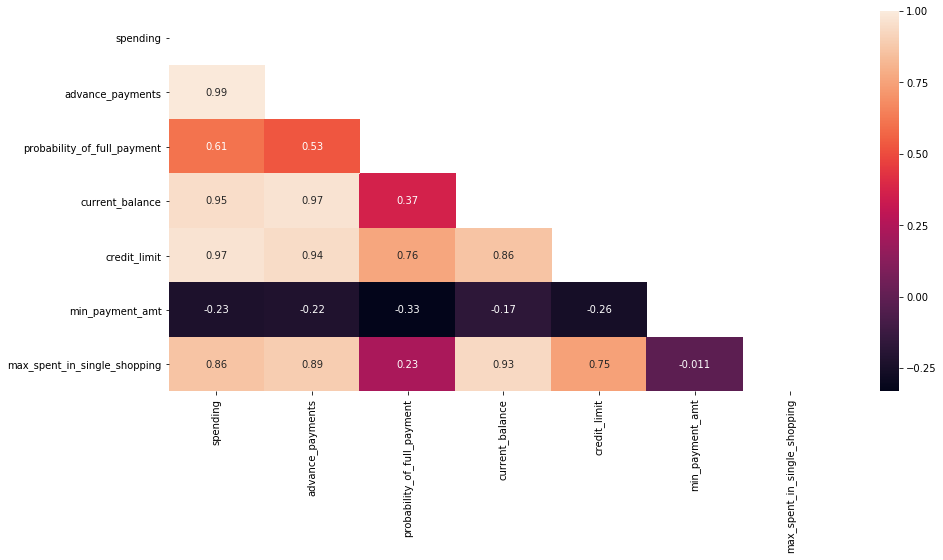

In [12]:
sns.color_palette("tab10")
plt.figure(figsize=(15,7))
mask = np.triu(np.ones_like(bank.corr(), dtype=bool))
sns.heatmap(bank.corr(),annot = True,mask=mask)

We can see high positive correlation among following variables :
1. spending and advance_payment
2. spending and current_balance
3. spending and credit_limit 
4. spending and max_spent_in_single_shopping
5. current_balance and advance_payment 
6. credit_limit and advance_payment 
7. max_spend_in_single_shopping and advance_payment
8. max_spend_in_single_shopping and current_balance 
9. credit_limit and current_balance 

- Multicollinearity is present between the variables hence we apply Principal Component Analysis on the dataset.
- But collinearity doesn't matter in clustering as clustering doesn't rely on linear assumptions, and so collinearity wouldn't cause issues.
- Also k-means is not badly affected by collinearity/correlations. 
- Hence I have not perfrom PCA on this dataset. 

## Outliers

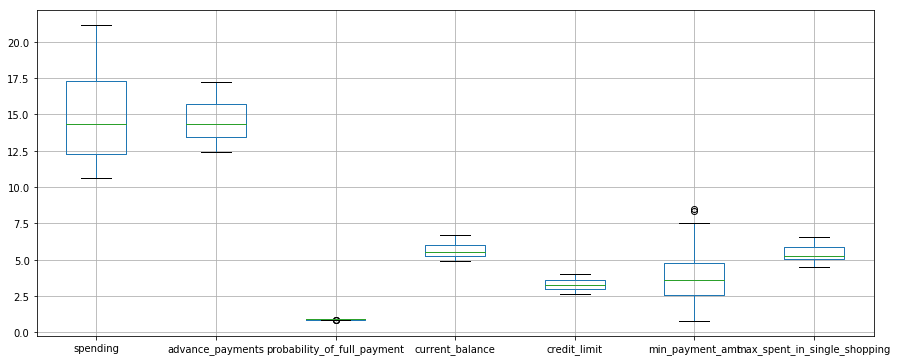

In [13]:
# Check if dataset has outliers.
plt.figure(figsize=(15,6))
bank.boxplot()
plt.show()

There are two variables how has outliers which is probability_of_full_payment and min_payment_amt. Lets visualize this varibales seperatly.

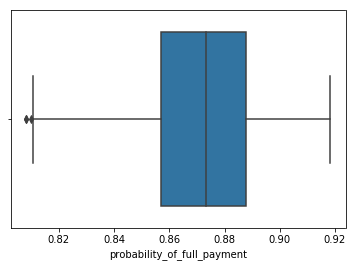

In [14]:
sns.boxplot(x = 'probability_of_full_payment', data=bank)

In [15]:
bank[bank.probability_of_full_payment<0.81]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
77,12.13,13.73,0.8081,5.394,2.745,4.825,5.220
189,11.75,13.52,0.8082,5.444,2.678,4.378,5.310


There are 3 such record whoes Probaility of full payment by the customer is less than 0.81(81%).

We can see that there are three outliers present in the feature probability_of_full_payment.

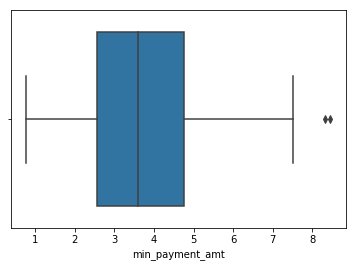

In [16]:
sns.boxplot(x = 'min_payment_amt', data=bank)

In [17]:
bank[bank.min_payment_amt > 8]

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
5,12.7,13.41,0.8874,5.183,3.091,8.456,5.000
89,13.2,13.66,0.8883,5.236,3.232,8.315,5.056


There are two record where the minimum payment amount is greater than 8.

#### Insights on outliers

- Hierarchical Clustering is highly sensitive to outliers. 
- In our dataset the outliers are very less hence we drop thoes records 

In [18]:
bank.drop(labels = [5,89,3,77,189], axis=0, inplace=True)

In [19]:
bank.set_index('spending', inplace=True)

In [20]:
bank.reset_index(inplace=True)

In [21]:
bank.head(10)

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,17.99,15.86,0.8992,5.890,3.694,2.068,5.837
4,12.02,13.33,0.8503,5.350,2.810,4.271,5.308
5,13.74,14.05,0.8744,5.482,3.114,2.932,4.825
6,18.17,16.26,0.8637,6.271,3.512,2.853,6.273
7,11.23,12.88,0.8511,5.140,2.795,4.325,5.003
8,18.55,16.22,0.8865,6.153,3.674,1.738,5.894
9,14.09,14.41,0.8529,5.717,3.186,3.920,5.299


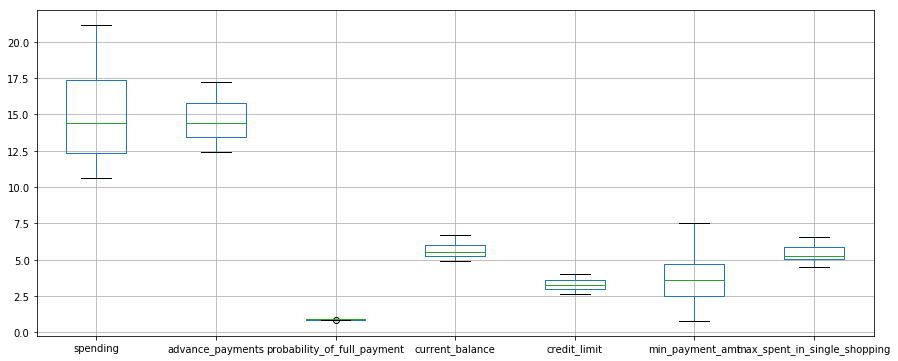

In [74]:
# Check if dataset has outliers.
plt.figure(figsize=(15,6))
bank.boxplot()
plt.show()

# 1.2 Do you think scaling is necessary for clustering in this case? Justify The learner is expected to check and comment about the difference in scale of different features on the bases of appropriate measure for example std dev, variance, etc. Should justify whether there is a necessity for scaling and which method is he/she using to do the scaling. Can also comment on how that method works.

## Scaling

Cluster is impacted by scaling. If variables in the data set have large differences in their variances, then all variables need to be scaled. Otherwise the variables(s) with larges variance will have disproportionately more influence on the construction of cluster.

In [22]:
# Checking the scale of all the variable
bank.var()

spending                        8.471153
advance_payments                1.714960
probability_of_full_payment     0.000512
current_balance                 0.198288
credit_limit                    0.141122
min_payment_amt                 2.077782
max_spent_in_single_shopping    0.245547
dtype: float64

Use StandardScaler to standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples and s is the standard deviation of the training sample. Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

In [23]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
scaled_bank = pd.DataFrame(ss.fit_transform(bank),columns=cont_cols)
scaled_bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.731064,1.786485,0.153099,2.338151,1.321161,-0.268768,2.297590
1,0.370598,0.232557,1.535786,-0.615423,0.838165,-0.210350,-0.546742
2,1.390086,1.403744,0.494339,1.376889,1.299814,-0.188096,1.484346
3,1.059441,0.975074,1.216705,0.570959,1.137036,-1.092173,0.855194
4,-0.996757,-0.961594,-0.950392,-0.644689,-1.221907,0.439889,-0.214970


In [24]:
scaled_bank.var()

spending                        1.004902
advance_payments                1.004902
probability_of_full_payment     1.004902
current_balance                 1.004902
credit_limit                    1.004902
min_payment_amt                 1.004902
max_spent_in_single_shopping    1.004902
dtype: float64

Now are data is scaled on the scale of 0 to 1.

# 1.3 Apply hierarchical clustering to scaled data (3 pts). Identify the number of optimum clusters using Dendrogram and briefly describe them (4). Students are expected to apply hierarchical clustering. It can be obtained via Fclusters or Agglomerative Clustering. Report should talk about the used criterion, affinity and linkage. Report must contain a Dendrogram and a logical reason behind choosing the optimum number of clusters and Inferences on the dendrogram. Customer segmentation can be visualized using limited features or whole data but it should be clear, correct and logical. Use appropriate plots to visualize the clusters.

## Hierarchy Clustering

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [26]:
link_method = linkage(scaled_bank, method = 'average')

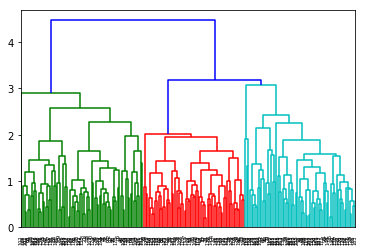

In [27]:
dendo = dendrogram(link_method)

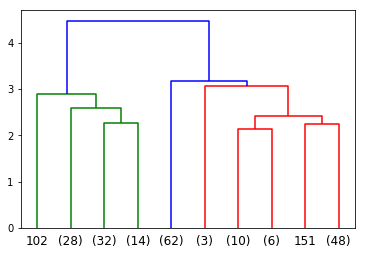

In [28]:
# Cutting the Dendrogram with suitable clusters
dend = dendrogram(link_method,
                 truncate_mode='lastp',
                 p = 10)

## Importing fcluster module to create clusters

In [29]:
from scipy.cluster.hierarchy import fcluster

In [30]:
# Set criterion as maxclust,then create 3 clusters, and store the result in another object 'clusters'
cluster_0 = fcluster(link_method, 3, criterion='maxclust')
cluster_0

array([1, 3, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2,
       3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 2, 2,
       3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 1, 3,
       1, 3, 3, 2, 1, 1, 2, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1,
       3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 2,
       2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 1,
       1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 1, 3, 3, 3, 2,
       3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3, 3, 2,
       3, 2, 3, 3, 1, 1, 3, 1, 3, 3, 3, 2, 1, 3, 1, 1, 2, 1, 2, 3, 3, 3,
       2, 1, 3, 1, 3, 3, 1], dtype=int32)

In [31]:
cluster_with_avg = bank.copy()
cluster_with_avg['Clusters'] = cluster_0
cluster_with_avg.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
4,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2


In [32]:
cluster_with_avg['Clusters'].value_counts()

1    75
3    68
2    62
Name: Clusters, dtype: int64

In [33]:
# Cluster profile
aggdata = cluster_with_avg.groupby('Clusters').mean()
aggdata['Freq'] = cluster_with_avg['Clusters'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clusters,,,,,,,,
1,18.129200,16.058000,0.881595,6.135747,3.648120,3.650200,5.987040,75
2,11.894355,13.267419,0.848218,5.243806,2.849452,4.853484,5.122581,62
3,14.121029,14.165294,0.882334,5.443529,3.230074,2.517724,5.048471,68


In [34]:
# Create linkage using ward function 
wardlink = linkage(scaled_bank, method='ward')

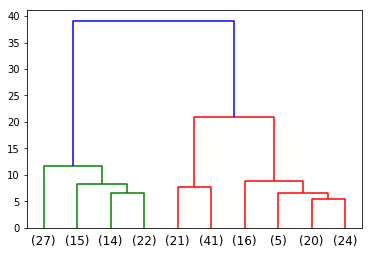

In [35]:
dendr = dendrogram(wardlink,
                  truncate_mode='lastp',
                  p= 10)

From the above dendogram we understant that there are 2 different color code green and red it represent that there are 2 different clusters. optimal 2 number of cluster

## Importing f-cluster model to create cluster

In [36]:
from scipy.cluster.hierarchy import fcluster

In [37]:
# criterion maxcluster
cluster = fcluster(wardlink, 3, criterion='maxclust')
cluster

array([1, 3, 1, 1, 2, 3, 1, 2, 1, 1, 2, 1, 3, 2, 3, 2, 2, 2, 2, 2, 1, 2,
       3, 1, 3, 2, 2, 2, 3, 2, 2, 3, 2, 2, 2, 2, 2, 1, 1, 3, 1, 1, 2, 2,
       3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1, 3, 2, 2, 1, 3, 1, 1, 3,
       1, 3, 3, 2, 1, 1, 2, 1, 3, 1, 3, 3, 3, 3, 1, 2, 1, 1, 1, 1, 3, 1,
       3, 2, 3, 1, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 1, 2, 2, 1, 1, 3, 1, 2,
       2, 1, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2, 3, 3, 2, 3, 3, 1, 2, 1,
       1, 2, 1, 3, 3, 3, 2, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3, 1, 3, 3, 3, 2,
       3, 1, 1, 2, 1, 1, 1, 2, 1, 3, 3, 3, 3, 2, 3, 1, 1, 1, 3, 3, 1, 2,
       3, 2, 3, 3, 1, 1, 3, 1, 3, 3, 3, 2, 1, 3, 1, 1, 2, 1, 2, 3, 1, 3,
       2, 1, 3, 1, 3, 1, 1], dtype=int32)

In [38]:
cluster_ward = bank.copy()
cluster_ward['Clusters'] = cluster
cluster_ward.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,3
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
4,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2


In [39]:
cluster_ward['Clusters'].value_counts()

1    78
3    65
2    62
Name: Clusters, dtype: int64

## Cluster Profiles 

In [40]:
aggdata = cluster_ward.groupby('Clusters').mean()
aggdata['Freq'] = cluster_ward['Clusters'].value_counts().sort_index()
aggdata

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clusters,,,,,,,,
1,18.068333,16.025385,0.882250,6.123154,3.644641,3.602051,5.967795,78
2,11.894355,13.267419,0.848218,5.243806,2.849452,4.853484,5.122581,62
3,14.009077,14.117077,0.881582,5.426692,3.214954,2.523234,5.028246,65


- Cluster 1: High spending group: Average Spending is high than any other cluster.
- Cluster 2: Low spending group: Average spending is very low than other two cluster.
- Cluster 3:Moderate spending group: Average spending is moderate than other two cluster.

## Using Agglomerative Clustering 

In [41]:
from sklearn.cluster import AgglomerativeClustering

In [42]:
agglo_data = bank.copy()

In [43]:
cluster_algo = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='average')
cluster_agglo = cluster_algo.fit_predict(agglo_data)
print(cluster_agglo)

[1 0 1 1 2 0 1 2 1 0 2 1 0 2 0 2 0 0 2 2 1 0 0 0 0 2 2 2 0 2 2 0 2 2 2 2 2
 1 1 0 1 1 2 2 0 1 1 1 0 1 1 1 1 1 2 2 2 1 0 2 2 0 0 1 1 0 1 2 0 2 1 1 2 1
 0 1 0 0 0 0 1 2 0 0 0 1 0 1 0 2 2 1 1 1 2 1 0 1 0 1 0 1 1 2 2 1 0 0 1 2 2
 1 0 2 2 1 0 2 2 0 0 0 1 2 0 0 2 0 2 1 2 1 1 2 1 0 0 0 2 2 0 2 1 2 0 2 0 2
 0 0 0 0 0 2 0 1 1 2 1 1 1 2 0 0 0 0 0 2 0 1 1 1 0 0 0 2 0 0 0 0 1 1 0 0 0
 0 0 2 1 0 1 1 2 1 2 0 1 0 2 1 0 1 0 0 0]


In [44]:
agglo_data['Agglo_clusters'] = cluster_agglo
agglo_data.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Agglo_clusters
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
4,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2


In [45]:
agglo_data['Agglo_clusters'].value_counts()

0    81
1    65
2    59
Name: Agglo_clusters, dtype: int64

In [46]:
# Cluster profile
agglo_profile = agglo_data.groupby('Agglo_clusters').mean()
agglo_profile['Freq'] = agglo_data.Agglo_clusters.value_counts().sort_index()
agglo_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Agglo_clusters,,,,,,,,
0,14.232716,14.261358,0.877623,5.500580,3.221778,2.679249,5.136136,81
1,18.569231,16.235077,0.884386,6.183723,3.705569,3.636262,6.047231,65
2,11.822373,13.215593,0.849749,5.219797,2.849051,4.957797,5.098763,59


Cluster 0: Moderate Spending customers 
Cluster 1: High spending customers
Cluster 2: Low Spending customers 

# 1.4 Apply K-Means clustering on scaled data and determine optimum clusters (2 pts). Apply elbow curve and silhouette score (3 pts). Interpret the inferences from the model (2.5 pts). K-means clustering code application with different number of clusters. Calculation of WSS(inertia for each value of k) Elbow Method must be applied and visualized with different values of K. Reasoning behind the selection of the optimal value of K must be explained properly. Silhouette Score must be calculated for the same values of K taken above and commented on. Report must contain logical and correct explanations for choosing the optimum clusters using both elbow method and silhouette scores. Append cluster labels obtained from K-means clustering into the original data frame. Customer Segmentation can be visualized using appropriate graphs.

## Using k-Means clustering 

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

In [48]:
kmean = KMeans(n_clusters=2, random_state=1)

In [49]:
kmean.fit(scaled_bank)

KMeans(n_clusters=2, random_state=1)

In [50]:
# Kmean output for all the observation
kmean.labels_

array([1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1])

In [51]:
# within sum of square distances between the two cluster
kmean.inertia_

645.4453676317239

### Forming clusters with K = 1,2,3,4,5,6 and comparing the WSS¶

In [52]:
k_mean = KMeans(n_clusters=1)
k_mean.fit(scaled_bank) 
k_mean.inertia_

1435.0000000000011

In [53]:
k_mean = KMeans(n_clusters=2)
k_mean.fit(scaled_bank) 
k_mean.inertia_

645.4453676317239

In [54]:
k_mean = KMeans(n_clusters=3)
k_mean.fit(scaled_bank) 
k_mean.inertia_

419.79996553869273

In [55]:
k_mean = KMeans(n_clusters=4)
k_mean.fit(scaled_bank) 
k_mean.inertia_

360.50860061832793

In [56]:
k_mean = KMeans(n_clusters=5)
k_mean.fit(scaled_bank) 
k_mean.inertia_

316.18002006166495

In [57]:
k_mean = KMeans(n_clusters=6)
k_mean.fit(scaled_bank) 
k_mean.inertia_

291.82586919290134

#### WSS reduces as K keeps increasing

In [58]:
data_kmean = bank.copy()

## Calculating WSS for other values of K - Elbow Method

In [59]:
wss=[]

In [60]:
for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit(scaled_bank)
    wss.append(km.inertia_)

In [61]:
wss

[1435.0000000000011,
 645.5929526552377,
 419.79996553869273,
 359.96282554594603,
 316.1727057473834,
 287.9715075953042,
 261.03722120350244,
 241.84202444974792,
 221.95203687499017,
 203.52866600173178]

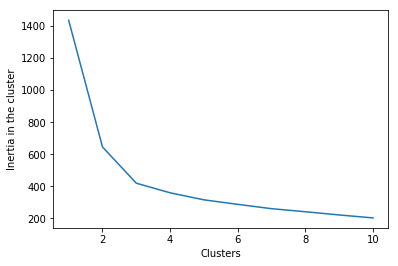

In [62]:
plt.plot(range(1,11), wss)
plt.xlabel("Clusters")
plt.ylabel("Inertia in the cluster")
plt.show()

Finally we come to know that 3 is the optimum size of cluster

### KMeans with K=3

In [63]:
k_means3 = KMeans(n_clusters = 3,random_state=1)
k_means3.fit(scaled_bank)
labels_3= k_means3.labels_

### Cluster evaluation for 3 clusters: the silhouette score

In [64]:
silhouette_score(scaled_bank,labels_3,random_state=1)

0.403501740730023

### KMeans with K=4

In [65]:
k_means4 = KMeans(n_clusters = 4,random_state=1)
k_means4.fit(scaled_bank)
labels_4 = k_means4.labels_

### Cluster evaluation for 4 clusters

In [66]:
silhouette_score(scaled_bank,labels_4,random_state=1)

0.3296234742539048

silhouette score is better for 3 clusters than for 4 clusters. So, final clusters will be 3

## Appending Clusters to the original dataset

In [67]:
data_kmean['Clus_KMeans_3'] = labels_3
data_kmean.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_KMeans_3
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1
3,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1
4,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2


In [68]:
sil_sample = silhouette_samples(data_kmean, labels_3)

## Cluster Profiling

In [69]:
data_kmean.Clus_KMeans_3.value_counts().sort_index()

0    71
1    68
2    66
Name: Clus_KMeans_3, dtype: int64

In [70]:
#clust_profile=scaled_bank.drop(['Bank'],axis=1)
clust_profile=data_kmean.groupby('Clus_KMeans_3').mean()
clust_profile['freq']=data_kmean.Clus_KMeans_3.value_counts().sort_index()
clust_profile

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,freq
Clus_KMeans_3,,,,,,,,
0,14.379437,14.305775,0.881786,5.500746,3.253746,2.676454,5.105423,71
1,18.449559,16.184265,0.884010,6.171397,3.691221,3.644574,6.038074,68
2,11.846364,13.241364,0.848308,5.231045,2.846985,4.667076,5.103788,66


In [71]:
sil_sample = silhouette_samples(data_kmean, labels_3)

In [72]:
data_kmean['silhouette_sample'] = sil_sample
data_kmean.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clus_KMeans_3,silhouette_sample
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550,1,0.636073
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144,0,0.326822
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148,1,0.678764
3,17.99,15.86,0.8992,5.890,3.694,2.068,5.837,1,0.471320
4,12.02,13.33,0.8503,5.350,2.810,4.271,5.308,2,0.645878


In [73]:
scaled_bank.to_csv("km_cluster.csv")

# 1.5 Describe cluster profiles for the clusters defined (2.5 pts). Recommend different promotional strategies for different clusters in context to the business problem in-hand (2.5 pts ). After adding the final clusters to the original dataframe, do the cluster profiling. Divide the data in the finalyzed groups and check their means. Explain each of the group briefly. There should be at least 3-4 Recommendations. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks will only be allotted if the recommendations are correct and business specific. variable means. Students to explain the profiles and suggest a mechanism to approach each cluster. Any logical explanation is acceptable.

- Cluster 1 : High Spending
- Cluster 0 : Medium Spending
- Cluster 2 : Low Spending

## Promotional strategies for each cluster

Group 1 : High Spending Group
- Giving any reward points might increase their purchases.
- maximum max_spent_in_single_shopping is high for this group, so can be offered discount/offer on next transactions upon full payment
- Increase there credit limit and 
- Increase spending habits
- Give loan against the credit card, as they are customers with good repayment record.
- Tie up with luxary brands, which will drive more one_time_maximun spending

Group 0 : Medium Spending Group
- They are potential target customers who are paying bills and doing purchases and maintaining comparatively good credit score. So we can increase credit limit or can lower down interest rate. 
- Promote premium cards/loyality cars to increase transcations.
- Increase spending habits by trying with premium ecommerce sites, travel portal, travel airlines/hotel, as this will encourge them to spend more

Group 2 : Low Spending Group
- customers should be given remainders for payments. Offers can be provided on early payments to improve their payment rate.
- Increase there spending habits by tieing up with grocery stores, utlities (electircity, phone, gas, others)

# Problem Statement 2
Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

Attribute Information:
1. Target: Claim Status (Claimed)
2. Code of tour firm (Agency_Code)
3. Type of tour insurance firms (Type)
4. Distribution channel of tour insurance agencies (Channel)
5. Name of the tour insurance products (Product)
6. Duration of the tour (Duration in days)
7. Destination of the tour (Destination)
8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)
9. The commission received for tour insurance firm (Commission is in percentage of sales)
10. Age of insured (Age)

2.1 Read the data and do exploratory data analysis (4 pts). Describe the data briefly. Interpret the inferences for each (2 pts). Initial steps like head() .info(), Data Types, etc . Null value check. Distribution plots(histogram) or similar plots for the continuous columns. Box plots, Correlation plots. Appropriate plots for categorical variables. Inferences on each plot. Summary stats, Skewness, Outliers proportion should be discussed, and inferences from above used plots should be there. There is no restriction on how the learner wishes to implement this but the code should be able to represent the correct output and inferences should be logical and correct.

In [75]:
df = pd.read_csv('insurance_part2_data.csv')
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


## Exploratory Data Analysis

In [76]:
df.shape

(3000, 10)

In [77]:
# checking the data types and other info of variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
Age             3000 non-null int64
Agency_Code     3000 non-null object
Type            3000 non-null object
Claimed         3000 non-null object
Commision       3000 non-null float64
Channel         3000 non-null object
Duration        3000 non-null int64
Sales           3000 non-null float64
Product Name    3000 non-null object
Destination     3000 non-null object
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


In [78]:
# Check the missing values
df.isnull().sum()

Age             0
Agency_Code     0
Type            0
Claimed         0
Commision       0
Channel         0
Duration        0
Sales           0
Product Name    0
Destination     0
dtype: int64

- 10 variables
- Age, Commision, Duration, Sales are numeric variable
- rest are categorial variables
- 3000 records, no missing one
- 9 independant variable and one target variable - Clamied

In [79]:
df.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


- duration has negative value, it is not possible. Wrong entry.
- Commision & Sales- mean and median varies signficantly
- Categorial code variable maximun unique count is 5

In [80]:
df[df.Duration <=1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
343,36,EPX,Travel Agency,No,0.00,Online,1,47.00,Customised Plan,ASIA
424,48,C2B,Airlines,Yes,5.98,Online,1,21.35,Customised Plan,ASIA
437,36,EPX,Travel Agency,No,0.00,Online,1,24.00,Customised Plan,ASIA
487,58,EPX,Travel Agency,No,0.00,Online,1,10.00,Cancellation Plan,ASIA
521,57,EPX,Travel Agency,No,0.00,Online,1,10.00,Cancellation Plan,ASIA
775,36,EPX,Travel Agency,No,0.00,Online,1,10.00,Cancellation Plan,EUROPE
781,36,EPX,Travel Agency,No,0.00,Online,1,10.00,Cancellation Plan,ASIA
958,36,EPX,Travel Agency,No,0.00,Online,1,10.00,Cancellation Plan,ASIA
987,36,EPX,Travel Agency,No,0.00,Online,1,13.00,Cancellation Plan,ASIA
1430,36,EPX,Travel Agency,No,0.00,Online,1,20.00,Customised Plan,ASIA


There is one such value whoes duration of the tour is -1 which can not be possible. 
We can replce this value either with positive 1 or with the mean value of that variable or we can also drop this value because there is only one such record. 
Let us replace this value from -1 to 1 

In [81]:
df.replace(-1,1, inplace=True)

In [82]:
# Let us check whether the value is replce or not 
df[df.Duration <= -1]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [83]:
df.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.002000,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.052965,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


In [84]:
df[df.Duration >= 4580]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
2845,48,C2B,Airlines,No,0.09,Online,4580,0.32,Customised Plan,ASIA


In [85]:
df.drop(labels=[2845], axis=0, inplace=True)

In [86]:
df[df.Duration >= 4580]

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination


In [87]:
# Get unique count of Nomial variable
for column in df[['Agency_Code', 'Type', 'Claimed', 'Channel', 
                  'Product Name', 'Destination']]:
    print(column.upper(),': ',df[column].nunique())
    print(df[column].value_counts().sort_values())
    print('\n')

AGENCY_CODE :  4
JZI     239
CWT     472
C2B     923
EPX    1365
Name: Agency_Code, dtype: int64


TYPE :  2
Airlines         1162
Travel Agency    1837
Name: Type, dtype: int64


CLAIMED :  2
Yes     924
No     2075
Name: Claimed, dtype: int64


CHANNEL :  2
Offline      46
Online     2953
Name: Channel, dtype: int64


PRODUCT NAME :  5
Gold Plan             109
Silver Plan           427
Bronze Plan           650
Cancellation Plan     678
Customised Plan      1135
Name: Product Name, dtype: int64


DESTINATION :  3
EUROPE       215
Americas     320
ASIA        2464
Name: Destination, dtype: int64




In [88]:
# Checking the duplicated data
dups = df.duplicated()
print("Number of duplicated rows = %d" % (dups.sum()))
df[dups].head()

Number of duplicated rows = 139


,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
63,30,C2B,Airlines,Yes,15.0,Online,27,60.0,Bronze Plan,ASIA
329,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA
407,36,EPX,Travel Agency,No,0.0,Online,11,19.0,Cancellation Plan,ASIA
411,35,EPX,Travel Agency,No,0.0,Online,2,20.0,Customised Plan,ASIA
422,36,EPX,Travel Agency,No,0.0,Online,5,20.0,Customised Plan,ASIA


Since we have 139 duplicate records in the data, we will remove this from the data set so that we get only distinct records.

Post removing the duplicate, we will check whether the duplicates has been removed from the data set or not.

## Outlier Treatment
To check for outliers, we will be plotting the box plots.

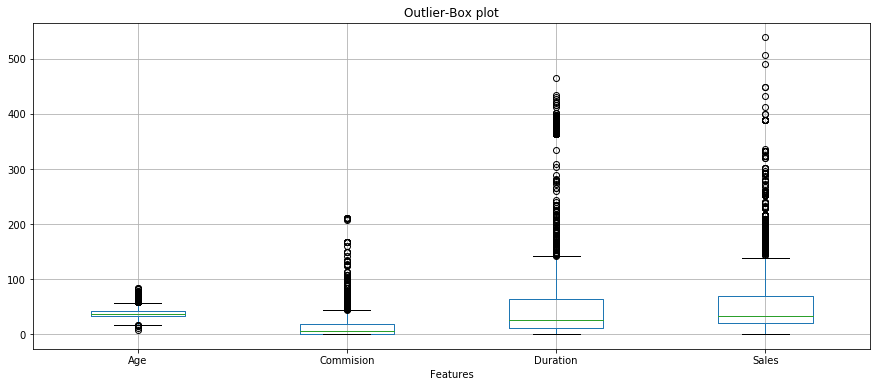

In [89]:
plt.figure(figsize=(15,6))
df.boxplot()
plt.xlabel('Features')
plt.title("Outlier-Box plot")
plt.show()

Looking at the box plot, it seems that the each variables have outlier present.

These outliers value needs to be teated and there are several ways of treating them:

- Drop the outlier value
- Replace the outlier value using the IQR

Created a user definded function for finding the lower and upper range for a variable so that outlier can be treated.

If you look at the box plots above,post treating the outlier there are no outliers in all these columns.

There are outliers in all the variables, but the sales and commision can be a geneui business value. Random Forest and CART can handle the outliers. Hence, Outliers are not treated for now, we will keep the data as it is.

I will treat the outliers for the ANN model to compare the same after the all the steps just for comparsion.

## Data Visualization

### Univarient analysis for Numerical Variable 

AGE
Skew : 1.15


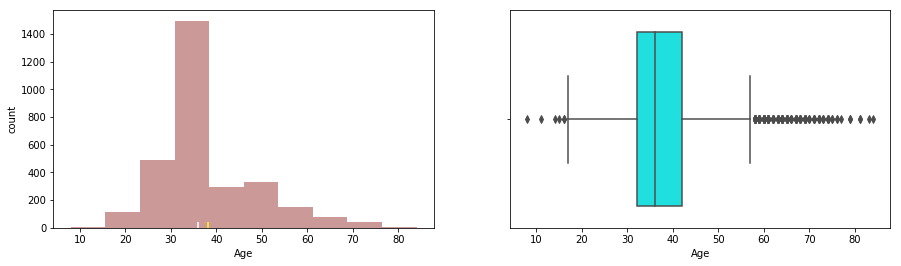

COMMISION
Skew : 3.15


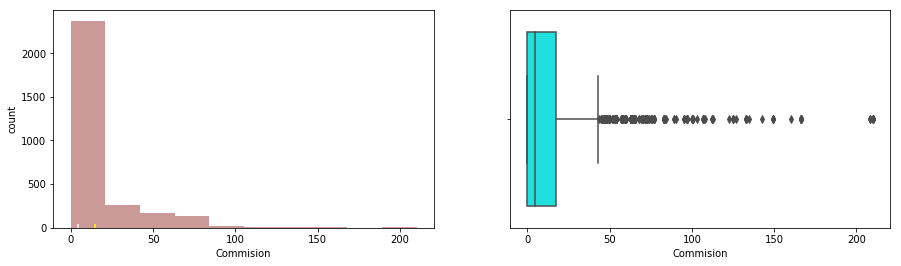

DURATION
Skew : 2.24


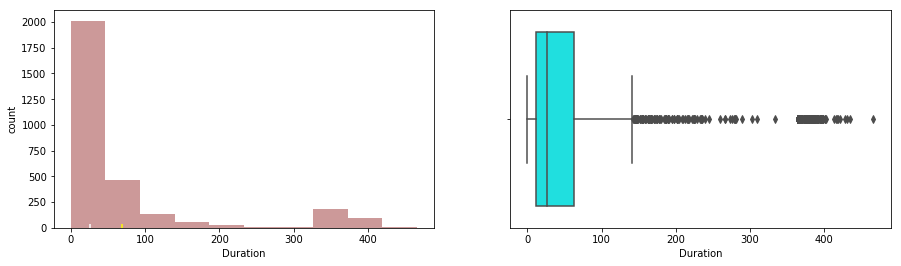

SALES
Skew : 2.38


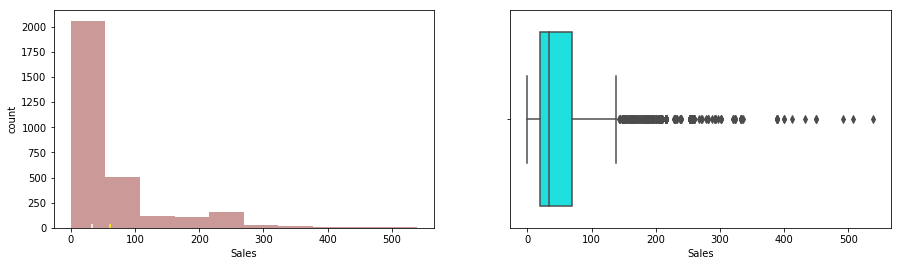

In [90]:
cont_cols = df[['Age','Commision','Duration','Sales']]
for col in cont_cols:
    print(col.upper())
    print('Skew :',round(df[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    # bank[col].hist(bins=10,edgecolor='#E6E6E6', color='Maroon')
    sns.distplot(df[col],norm_hist=False,kde = False,bins = 10, color='Maroon')
    plt.vlines(df[col].mean(),ymin = 0, ymax = 40,color = 'Yellow')
    plt.vlines(df[col].median(),ymin = 0, ymax = 40,color = 'White')
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(df[col],color='Cyan')
    plt.show()

### Univarient Analysis for Categorical variables 

AGENCY_CODE


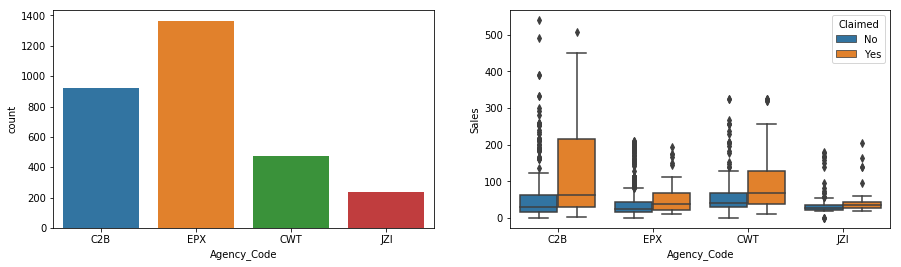

TYPE


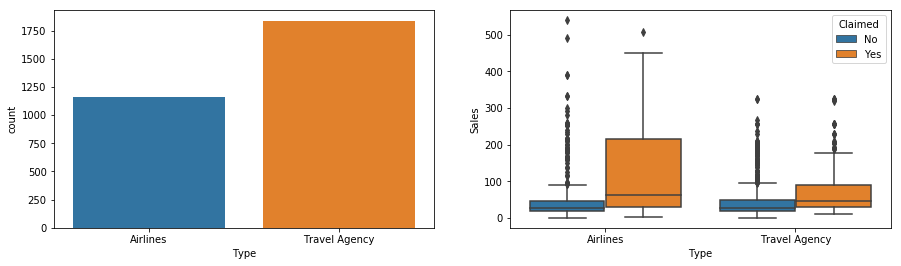

CLAIMED


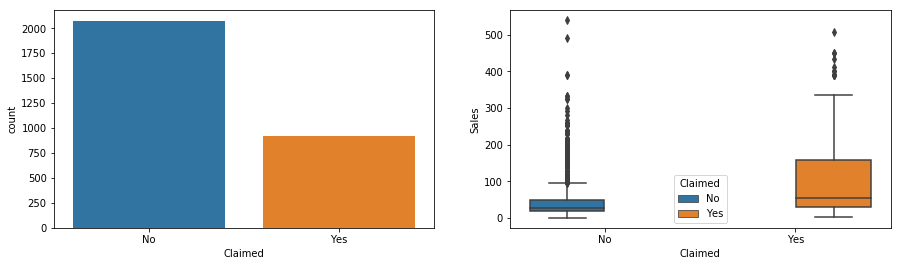

CHANNEL


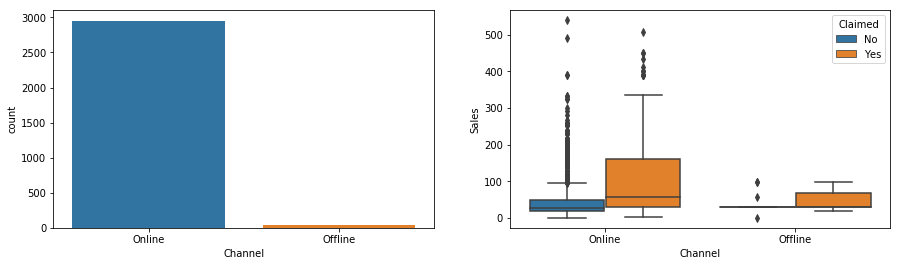

PRODUCT NAME


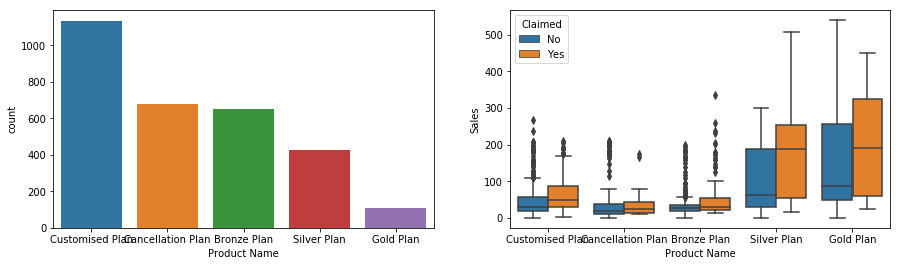

DESTINATION


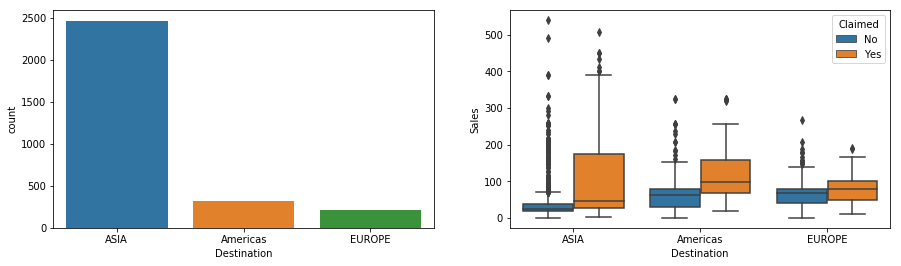

In [91]:
cont_cols = df[['Agency_Code','Type','Claimed','Channel','Product Name','Destination']]
for col in cont_cols:
    print(col.upper())
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    # bank[col].hist(bins=10,edgecolor='#E6E6E6', color='Maroon')
    sns.countplot(data = df, x = df[col])
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(data = df, x= df[col],y='Sales', hue='Claimed')
    plt.show()

### Bivarient Analysis on numerical variables

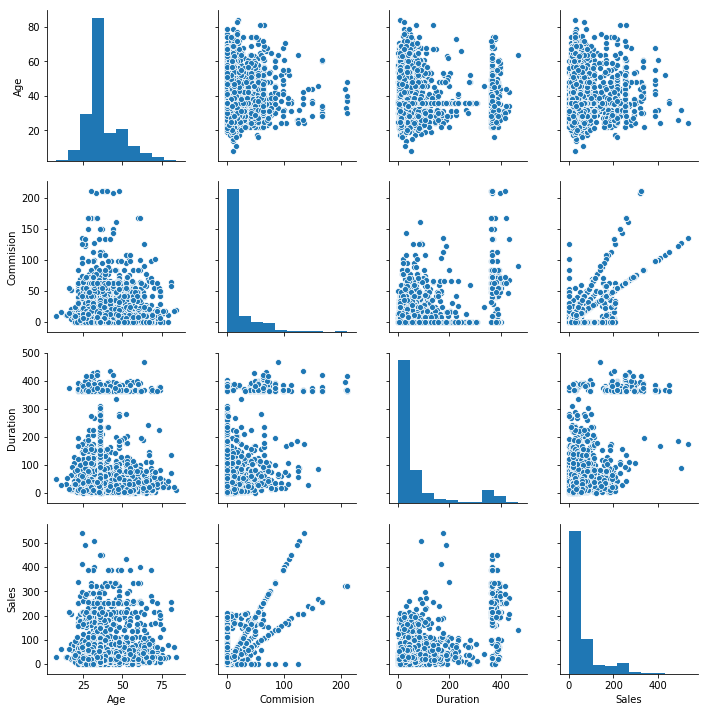

In [92]:
# Checking pairwise distribution of the continuous variables
sns.pairplot(df[['Age', 'Commision', 
    'Duration', 'Sales']])

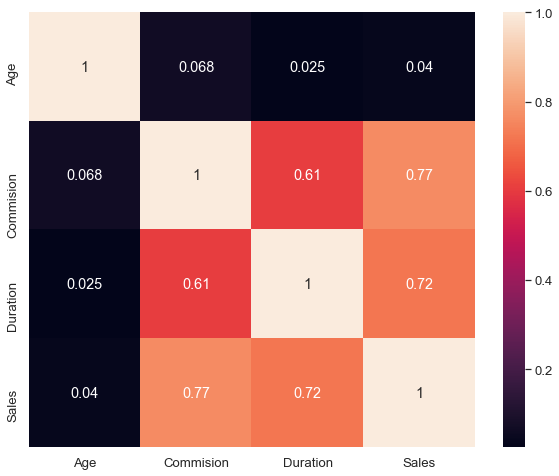

In [93]:
# Checking for Correlation
# create heatmap with only numerical variables
plt.figure(figsize=(10,8))
sns.set(font_scale=1.2)
sns.heatmap(df[['Age', 'Commision', 
    'Duration', 'Sales']].corr(), annot=True)

### Encoding

In [94]:
# Converting all objects to categorical codes
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df[feature].unique()))
        print(pd.Categorical(df[feature].unique()).codes)
        df[feature] = pd.Categorical(df[feature]).codes



feature: Agency_Code
[C2B, EPX, CWT, JZI]
Categories (4, object): [C2B, CWT, EPX, JZI]
[0 2 1 3]


feature: Type
[Airlines, Travel Agency]
Categories (2, object): [Airlines, Travel Agency]
[0 1]


feature: Claimed
[No, Yes]
Categories (2, object): [No, Yes]
[0 1]


feature: Channel
[Online, Offline]
Categories (2, object): [Offline, Online]
[1 0]


feature: Product Name
[Customised Plan, Cancellation Plan, Bronze Plan, Silver Plan, Gold Plan]
Categories (5, object): [Bronze Plan, Cancellation Plan, Customised Plan, Gold Plan, Silver Plan]
[2 1 0 4 3]


feature: Destination
[ASIA, Americas, EUROPE]
Categories (3, object): [ASIA, Americas, EUROPE]
[0 1 2]


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2999 entries, 0 to 2999
Data columns (total 10 columns):
Age             2999 non-null int64
Agency_Code     2999 non-null int8
Type            2999 non-null int8
Claimed         2999 non-null int8
Commision       2999 non-null float64
Channel         2999 non-null int8
Duration        2999 non-null int64
Sales           2999 non-null float64
Product Name    2999 non-null int8
Destination     2999 non-null int8
dtypes: float64(2), int64(2), int8(6)
memory usage: 214.7 KB


In [96]:
df.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0,0.00,1,34,20.00,2,0
2,39,1,1,0,5.94,1,3,9.90,2,1
3,36,2,1,0,0.00,1,4,26.00,1,0
4,33,3,0,0,6.30,1,53,18.00,0,0


In [97]:
# Hence our data is converted into Numerical 

In [98]:
df.Claimed.value_counts(normalize=True)

0    0.691897
1    0.308103
Name: Claimed, dtype: float64

# 2.2 Data Split: Split the data into test and train(1 pts), build classification model CART (1.5 pts), Random Forest (1.5 pts), Artificial Neural Network(1.5 pts). Object data should be converted into categorical/numerical data to fit in the models. (pd.categorical().codes(), pd.get_dummies(drop_first=True)) Data split, ratio defined for the split, train-test split should be discussed. Any reasonable split is acceptable. Use of random state is mandatory. Successful implementation of each model. Logical reason behind the selection of different values for the parameters involved in each model. Apply grid search for each model and make models on best_params. Feature importance for each model.

In [99]:
# Extracting the target column into separate vectors for training set and test set
X = df.drop("Claimed", axis=1)

y = df.pop("Claimed")

X.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,0,0,0.70,1,7,2.51,2,0
1,36,2,1,0.00,1,34,20.00,2,0
2,39,1,1,5.94,1,3,9.90,2,1
3,36,2,1,0.00,1,4,26.00,1,0
4,33,3,0,6.30,1,53,18.00,0,0


In [100]:
print(X.shape)
print(y.shape)

(2999, 9)
(2999,)


In [101]:
# Scaling our variables.
from scipy.stats import zscore
X_scaled=X.apply(zscore)
X_scaled.head()

,Age,Agency_Code,Type,Commision,Channel,Duration,Sales,Product Name,Destination
0,0.947462,-1.314956,-1.257336,-0.542934,0.124809,-0.581476,-0.816677,0.268883,-0.434732
1,-0.199551,0.697574,0.795332,-0.570407,0.124809,-0.326186,-0.569383,0.268883,-0.434732
2,0.087202,-0.308691,0.795332,-0.337284,0.124809,-0.619296,-0.712189,0.268883,1.303616
3,-0.199551,0.697574,0.795332,-0.570407,0.124809,-0.609841,-0.484548,-0.525580,-0.434732
4,-0.486305,1.703839,-1.257336,-0.323155,0.124809,-0.146538,-0.597661,-1.320044,-0.434732


In [102]:
from sklearn.model_selection import train_test_split

X_train, X_test, train_labels, test_labels = train_test_split(X_scaled, y, test_size=.30, random_state=5)

## Building a Decision Tree Classifier

In [103]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [104]:
from sklearn.model_selection import GridSearchCV

In [105]:
param_grid_dtcl = {
    'criterion': ['gini'],
    'max_depth': [4.85,4.95,5.05,5.15],
    'min_samples_leaf': [42, 43, 44], 
    'min_samples_split': [220, 230, 250, 260],
}

dtcl = DecisionTreeClassifier(random_state=1)

grid_search_dtcl = GridSearchCV(estimator = dtcl, param_grid = param_grid_dtcl, cv = 5)

In [106]:
grid_search_dtcl.fit(X_train, train_labels)
print(grid_search_dtcl.best_params_)
best_grid_dtcl = grid_search_dtcl.best_estimator_
best_grid_dtcl

{'criterion': 'gini', 'max_depth': 4.85, 'min_samples_leaf': 42, 'min_samples_split': 250}


DecisionTreeClassifier(max_depth=4.85, min_samples_leaf=42,
                       min_samples_split=250, random_state=1)

In [107]:
# Generating Tree
train_char_label = ['no', 'yes']
tree_regularized = open('tree_regularized.dot','w')
dot_data = tree.export_graphviz(best_grid_dtcl, out_file= tree_regularized ,
                                feature_names = list(X_train),
                                class_names = list(train_char_label))

tree_regularized.close()
dot_data

In [108]:
# Variable Importance - DTCL
print (pd.DataFrame(best_grid_dtcl.feature_importances_, columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.623380
Sales         0.231040
Product Name  0.082477
Commision     0.048987
Duration      0.014116
Age           0.000000
Type          0.000000
Channel       0.000000
Destination   0.000000


In [109]:
# Predicting on Training and Test dataset
ytrain_predict_dtcl = best_grid_dtcl.predict(X_train)
ytest_predict_dtcl = best_grid_dtcl.predict(X_test)

In [110]:
# Getting the Predicted Classes and Probs
ytest_predict_dtcl
ytest_predict_prob_dtcl=best_grid_dtcl.predict_proba(X_test)
ytest_predict_prob_dtcl
pd.DataFrame(ytest_predict_prob_dtcl).head()

,0,1
0,0.458333,0.541667
1,0.403162,0.596838
2,0.666667,0.333333
3,0.666667,0.333333
4,0.666667,0.333333


## Building Random Forest 

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [113]:
param_grid_rfcl = {
    'max_depth': [4,5,6],
    'max_features': [2,3,4],
    'min_samples_leaf': [8,9],
    'min_samples_split': [46,50], 
    'n_estimators': [290,350] 
}

rfcl = RandomForestClassifier(random_state=1)

grid_search_rfcl = GridSearchCV(estimator = rfcl, param_grid = param_grid_rfcl, cv = 5)

In [114]:
grid_search_rfcl.fit(X_train, train_labels)
print(grid_search_rfcl.best_params_)
best_grid_rfcl = grid_search_rfcl.best_estimator_
best_grid_rfcl

{'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 8, 'min_samples_split': 46, 'n_estimators': 350}


RandomForestClassifier(max_depth=6, max_features=4, min_samples_leaf=8,
                       min_samples_split=46, n_estimators=350, random_state=1)

In [115]:
# Predicting the Training and Testing data
ytrain_predict_rfcl = best_grid_rfcl.predict(X_train)
ytest_predict_rfcl = best_grid_rfcl.predict(X_test)

In [116]:
# Getting the Predicted Classes and Probs
ytest_predict_rfcl
ytest_predict_prob_rfcl=best_grid_rfcl.predict_proba(X_test)
ytest_predict_prob_rfcl
pd.DataFrame(ytest_predict_prob_rfcl).head()

,0,1
0,0.569982,0.430018
1,0.477624,0.522376
2,0.738498,0.261502
3,0.756751,0.243249
4,0.727868,0.272132


In [117]:
# Variable Importance via RF
# Variable Importance
print (pd.DataFrame(best_grid_rfcl.feature_importances_, 
                    columns = ["Imp"], 
                    index = X_train.columns).sort_values('Imp',ascending=False))

                   Imp
Agency_Code   0.312005
Product Name  0.207646
Sales         0.174182
Commision     0.125980
Duration      0.073703
Type          0.048108
Age           0.047675
Destination   0.008193
Channel       0.002508


## Building Artifical Neural Network

In [118]:
from sklearn.neural_network import MLPClassifier

In [119]:
param_grid_nncl = {
    'hidden_layer_sizes': [50,100,200], # 50, 200
    'max_iter': [2500,3000,4000], #5000,2500
    'solver': ['adam'], #sgd
    'tol': [0.01], 
}

nncl = MLPClassifier(random_state=1)

grid_search_nncl = GridSearchCV(estimator = nncl, param_grid = param_grid_nncl, cv = 10)

In [120]:
grid_search_nncl.fit(X_train, train_labels)
grid_search_nncl.best_params_
best_grid_nncl = grid_search_nncl.best_estimator_
best_grid_nncl

MLPClassifier(hidden_layer_sizes=100, max_iter=2500, random_state=1, tol=0.01)

In [121]:
# Predicting the Training and Testing data
ytrain_predict_nncl = best_grid_nncl.predict(X_train)
ytest_predict_nncl = best_grid_nncl.predict(X_test)

In [122]:
# Getting the Predicted Classes and Probs
ytest_predict_nncl
ytest_predict_prob_nncl=best_grid_nncl.predict_proba(X_test)
ytest_predict_prob_nncl
pd.DataFrame(ytest_predict_prob_nncl).head()

,0,1
0,0.535533,0.464467
1,0.501802,0.498198
2,0.699465,0.300535
3,0.828267,0.171733
4,0.717741,0.282259


2.3 Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy (1 pts), Confusion Matrix (2 pts), Plot ROC curve and get ROC_AUC score for each model (2 pts), Make classification reports for each model. Write inferences on each model (2 pts). Calculate Train and Test Accuracies for each model. Comment on the validness of models (overfitting or underfitting) Build confusion matrix for each model. Comment on the positive class in hand. Must clearly show obs/pred in row/col Plot roc_curve for each model. Calculate roc_auc_score for each model. Comment on the above calculated scores and plots. Build classification reports for each model. Comment on f1 score, precision and recall, which one is important here.

AUC: 0.818


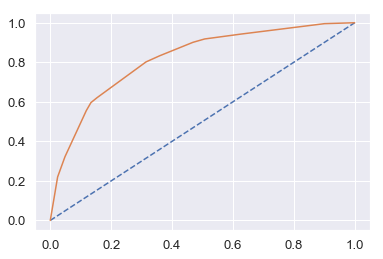

In [123]:
# CART - AUC and ROC for the training data
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_train_auc = roc_auc_score(train_labels, probs_cart)
print('AUC: %.3f' % cart_train_auc)
# calculate roc curve
cart_train_fpr, cart_train_tpr, cart_train_thresholds = roc_curve(train_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_train_fpr, cart_train_tpr)

AUC: 0.815


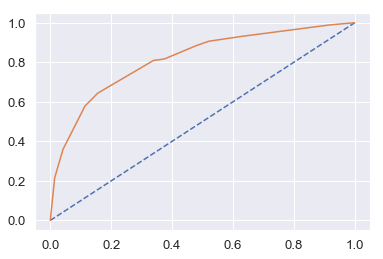

In [124]:
# CART -AUC and ROC for the test data
# predict probabilities
probs_cart = best_grid_dtcl.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs_cart = probs_cart[:, 1]
# calculate AUC
cart_test_auc = roc_auc_score(test_labels, probs_cart)
print('AUC: %.3f' % cart_test_auc)
# calculate roc curve
cart_test_fpr, cart_test_tpr, cart_testthresholds = roc_curve(test_labels, probs_cart)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(cart_test_fpr, cart_test_tpr)

In [125]:
# CART Confusion Matrix and Classification Report for the training data
confusion_matrix(train_labels, ytrain_predict_dtcl)

array([[1259,  194],
       [ 261,  385]], dtype=int64)

In [126]:
#Train Data Accuracy
cart_train_acc=best_grid_dtcl.score(X_train,train_labels) 
cart_train_acc

0.7832301095759886

In [127]:
print(classification_report(train_labels, ytrain_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1453
           1       0.66      0.60      0.63       646

    accuracy                           0.78      2099
   macro avg       0.75      0.73      0.74      2099
weighted avg       0.78      0.78      0.78      2099



In [128]:
# CART Confusion Matrix and Classification Report for the testing data
confusion_matrix(test_labels, ytest_predict_dtcl)

array([[535,  87],
       [106, 172]], dtype=int64)

In [129]:
#Test Data Accuracy
cart_test_acc=best_grid_dtcl.score(X_test,test_labels)
cart_test_acc

0.7855555555555556

In [130]:
print(classification_report(test_labels, ytest_predict_dtcl))

              precision    recall  f1-score   support

           0       0.83      0.86      0.85       622
           1       0.66      0.62      0.64       278

    accuracy                           0.79       900
   macro avg       0.75      0.74      0.74       900
weighted avg       0.78      0.79      0.78       900



In [131]:
cart_metrics=classification_report(train_labels, ytrain_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_train_f1=round(df.loc["1"][2],2)
cart_train_recall=round(df.loc["1"][1],2)
cart_train_precision=round(df.loc["1"][0],2)
print ('cart_train_precision ',cart_train_precision)
print ('cart_train_recall ',cart_train_recall)
print ('cart_train_f1 ',cart_train_f1)

cart_train_precision  0.63
cart_train_recall  0.66
cart_train_f1  0.6


In [132]:
cart_metrics=classification_report(test_labels, ytest_predict_dtcl,output_dict=True)
df=pd.DataFrame(cart_metrics).transpose()
cart_test_precision=round(df.loc["1"][0],2)
cart_test_recall=round(df.loc["1"][1],2)
cart_test_f1=round(df.loc["1"][2],2)
print ('cart_test_precision ',cart_test_precision)
print ('cart_test_recall ',cart_test_recall)
print ('cart_test_f1 ',cart_test_f1)

cart_test_precision  0.64
cart_test_recall  0.66
cart_test_f1  0.62


## Cart Conclusion
Train Data:
- AUC: 82%
- Accuracy: 79%
- Precision: 70%
- f1-Score: 60%

Test Data:
- AUC: 80%
- Accuracy: 77%
- Precision: 80%
- f1-Score: 84%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is the most important variable for predicting diabetes

## Random Forest Classifier

In [133]:
# RF Model Performance Evaluation on Training data
confusion_matrix(train_labels,ytrain_predict_rfcl)

array([[1290,  163],
       [ 254,  392]], dtype=int64)

In [134]:
rf_train_acc=best_grid_rfcl.score(X_train,train_labels) 
rf_train_acc

0.8013339685564554

In [135]:
print(classification_report(train_labels,ytrain_predict_rfcl))

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1453
           1       0.71      0.61      0.65       646

    accuracy                           0.80      2099
   macro avg       0.77      0.75      0.76      2099
weighted avg       0.80      0.80      0.80      2099



Area under Curve is 0.853144130111928


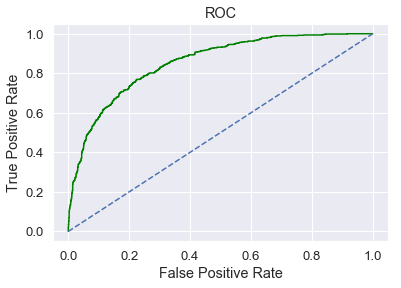

In [136]:
rf_train_fpr, rf_train_tpr,_=roc_curve(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
plt.plot(rf_train_fpr,rf_train_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_train_auc=roc_auc_score(train_labels,best_grid_rfcl.predict_proba(X_train)[:,1])
print('Area under Curve is', rf_train_auc)

In [137]:
# RF Model Performance Evaluation on Test data
confusion_matrix(test_labels,ytest_predict_rfcl)

array([[547,  75],
       [109, 169]], dtype=int64)

In [138]:
rf_test_acc=best_grid_rfcl.score(X_test,test_labels)
rf_test_acc

0.7955555555555556

In [139]:
print(classification_report(test_labels,ytest_predict_rfcl))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       622
           1       0.69      0.61      0.65       278

    accuracy                           0.80       900
   macro avg       0.76      0.74      0.75       900
weighted avg       0.79      0.80      0.79       900



In [140]:
rf_metrics=classification_report(train_labels, ytrain_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_train_precision=round(df.loc["1"][0],2)
rf_train_recall=round(df.loc["1"][1],2)
rf_train_f1=round(df.loc["1"][2],2)
print ('rf_train_precision ',rf_train_precision)
print ('rf_train_recall ',rf_train_recall)
print ('rf_train_f1 ',rf_train_f1)

rf_train_precision  0.65
rf_train_recall  0.71
rf_train_f1  0.61


Area under Curve is 0.8363453931388651


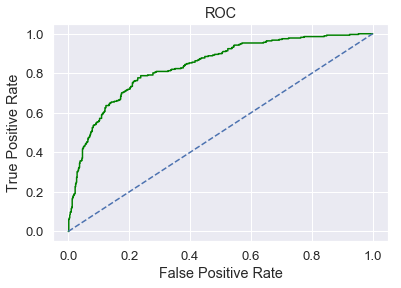

In [141]:
rf_test_fpr, rf_test_tpr,_=roc_curve(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
plt.plot(rf_test_fpr,rf_test_tpr,color='green')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
rf_test_auc=roc_auc_score(test_labels,best_grid_rfcl.predict_proba(X_test)[:,1])
print('Area under Curve is', rf_test_auc)

In [142]:
rf_metrics=classification_report(test_labels, ytest_predict_rfcl,output_dict=True)
df=pd.DataFrame(rf_metrics).transpose()
rf_test_precision=round(df.loc["1"][0],2)
rf_test_recall=round(df.loc["1"][1],2)
rf_test_f1=round(df.loc["1"][2],2)
print ('rf_test_precision ',rf_test_precision)
print ('rf_test_recall ',rf_test_recall)
print ('rf_test_f1 ',rf_test_f1)

rf_test_precision  0.65
rf_test_recall  0.69
rf_test_f1  0.61


## Random Forest Conclusion
Train Data:
- AUC: 86%
- Accuracy: 80%
- Precision: 72%
- f1-Score: 66%

Test Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 62

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

Change is again the most important variable for predicting diabetes

In [143]:
# NN Model Performance Evaluation on Training data
confusion_matrix(train_labels,ytrain_predict_nncl)

array([[1286,  167],
       [ 314,  332]], dtype=int64)

In [144]:
nn_train_acc=best_grid_nncl.score(X_train,train_labels) 
nn_train_acc

0.7708432586946165

In [145]:
print(classification_report(train_labels,ytrain_predict_nncl))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84      1453
           1       0.67      0.51      0.58       646

    accuracy                           0.77      2099
   macro avg       0.73      0.70      0.71      2099
weighted avg       0.76      0.77      0.76      2099



Area under Curve is 0.8053173854031054


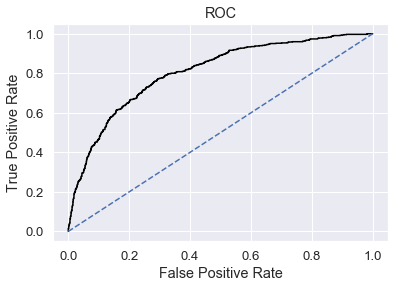

In [146]:
nn_train_fpr, nn_train_tpr,_=roc_curve(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
plt.plot(nn_train_fpr,nn_train_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_train_auc=roc_auc_score(train_labels,best_grid_nncl.predict_proba(X_train)[:,1])
print('Area under Curve is', nn_train_auc)

In [147]:
# NN Model Performance Evaluation on Test data
confusion_matrix(test_labels,ytest_predict_nncl)

array([[548,  74],
       [125, 153]], dtype=int64)

In [148]:
nn_test_acc=best_grid_nncl.score(X_test,test_labels)
nn_test_acc

0.7788888888888889

In [149]:
print(classification_report(test_labels,ytest_predict_nncl))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       622
           1       0.67      0.55      0.61       278

    accuracy                           0.78       900
   macro avg       0.74      0.72      0.73       900
weighted avg       0.77      0.78      0.77       900



In [150]:
nn_metrics=classification_report(train_labels, ytrain_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_train_precision=round(df.loc["1"][0],2)
nn_train_recall=round(df.loc["1"][1],2)
nn_train_f1=round(df.loc["1"][2],2)
print ('nn_train_precision ',nn_train_precision)
print ('nn_train_recall ',nn_train_recall)
print ('nn_train_f1 ',nn_train_f1)

nn_train_precision  0.58
nn_train_recall  0.67
nn_train_f1  0.51


Area under Curve is 0.8209564181452267


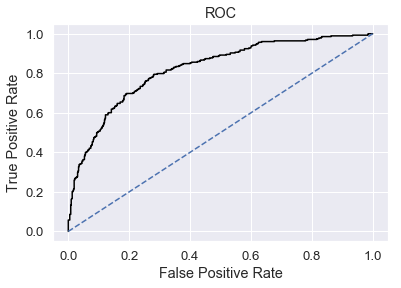

In [151]:
nn_test_fpr, nn_test_tpr,_=roc_curve(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
plt.plot(nn_test_fpr,nn_test_tpr,color='black')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
nn_test_auc=roc_auc_score(test_labels,best_grid_nncl.predict_proba(X_test)[:,1])
print('Area under Curve is', nn_test_auc)

In [152]:
nn_metrics=classification_report(test_labels, ytest_predict_nncl,output_dict=True)
df=pd.DataFrame(nn_metrics).transpose()
nn_test_precision=round(df.loc["1"][0],2)
nn_test_recall=round(df.loc["1"][1],2)
nn_test_f1=round(df.loc["1"][2],2)
print ('nn_test_precision ',nn_test_precision)
print ('nn_test_recall ',nn_test_recall)
print ('nn_test_f1 ',nn_test_f1)

nn_test_precision  0.61
nn_test_recall  0.67
nn_test_f1  0.55


### Neural Network Conclusion
Train Data:
- AUC: 82%
- Accuracy: 78%
- Precision: 68%
- f1-Score: 59

Test Data:
- AUC: 80%
- Accuracy: 77%
- Precision: 67%
- f1-Score: 57%

Training and Test set results are almost similar, and with the overall measures high, the model is a good model.

# 2.4 Final Model - Compare all models on the basis of the performance metrics in a structured tabular manner (2.5 pts). Describe on which model is best/optimized (1.5 pts ). A table containing all the values of accuracies, precision, recall, auc_roc_score, f1 score. Comparison between the different models(final) on the basis of above table values. After comparison which model suits the best for the problem in hand on the basis of different measures. Comment on the final model.

## Comparison of the performance metrics for the 3 models

In [153]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'CART Train':[cart_train_acc,cart_train_auc,cart_train_recall,cart_train_precision,cart_train_f1],
        'CART Test':[cart_test_acc,cart_test_auc,cart_test_recall,cart_test_precision,cart_test_f1],
       'Random Forest Train':[rf_train_acc,rf_train_auc,rf_train_recall,rf_train_precision,rf_train_f1],
        'Random Forest Test':[rf_test_acc,rf_test_auc,rf_test_recall,rf_test_precision,rf_test_f1],
       'Neural Network Train':[nn_train_acc,nn_train_auc,nn_train_recall,nn_train_precision,nn_train_f1],
        'Neural Network Test':[nn_test_acc,nn_test_auc,nn_test_recall,nn_test_precision,nn_test_f1]},index=index)
round(data,2)

,CART Train,CART Test,Random Forest Train,Random Forest Test,Neural Network Train,Neural Network Test
Accuracy,0.78,0.79,0.80,0.80,0.77,0.78
AUC,0.82,0.82,0.85,0.84,0.81,0.82
Recall,0.66,0.66,0.71,0.69,0.67,0.67
Precision,0.63,0.64,0.65,0.65,0.58,0.61
F1 Score,0.60,0.62,0.61,0.61,0.51,0.55


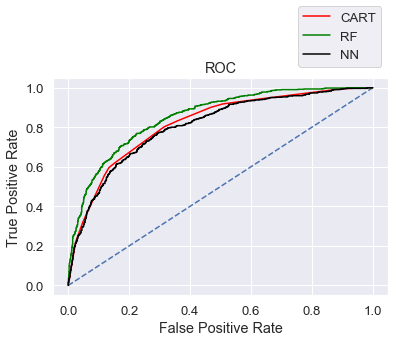

In [154]:
# ROC Curve for the 3 models on the Training data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_train_fpr, cart_train_tpr,color='red',label="CART")
plt.plot(rf_train_fpr,rf_train_tpr,color='green',label="RF")
plt.plot(nn_train_fpr,nn_train_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

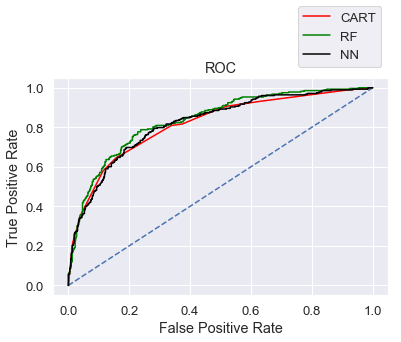

In [155]:
# ROC Curve for the 3 models on the Test data
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(cart_test_fpr, cart_test_tpr,color='red',label="CART")
plt.plot(rf_test_fpr,rf_test_tpr,color='green',label="RF")
plt.plot(nn_test_fpr,nn_test_tpr,color='black',label="NN")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc='lower right')

## CONCLUSION :
I am selecting the RF model, as it has better accuracy, precsion, recall, f1 score better than other two CART & NN.¶

## 2.5 Based on your analysis and working on the business problem, detail out appropriate insights and recommendations to help the management solve the business objective. There should be at least 3-4 Recommendations and insights in total. Recommendations should be easily understandable and business specific, students should not give any technical suggestions. Full marks should only be allotted if the recommendations are correct and business specific.

I strongly recommended we collect more real time unstructured data and past data if possible.

This is understood by looking at the insurance data by drawing relations between different variables such as day of the incident, time, age group, and associating it with other external information such as location, behavior patterns, weather information, airline/vehicle types, etc.

• Streamlining online experiences benefitted customers, leading to an increase in conversions, which subsequently raised profits. • As per the data 90% of insurance is done by online channel. • Other interesting fact, is almost all the offline business has a claimed associated, need to find why? • Need to train the JZI agency resources to pick up sales as they are in bottom, need to run promotional marketing campaign or evaluate if we need to tie up with alternate agency • Also based on the model we are getting 80%accuracy, so we need customer books airline tickets or plans, cross sell the insurance based on the claim data pattern. • Other interesting fact is more sales happen via Agency than Airlines and the trend shows the claim are processed more at Airline. So we may need to deep dive into the process to understand the workflow and why?
Key performance indicators (KPI) The KPI’s of insurance claims are: • Reduce claims cycle time • Increase customer satisfaction • Combat fraud • Optimize claims recovery • Reduce claim handling costs Insights gained from data and AI-powered analytics could expand the boundaries of insurability, extend existing products, and give rise to new risk transfer solutions in areas like a non-damage business interruption and reputational damage.

http://webgraphviz.com/